## Setups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Stage 1: Data Validation & Cleaning

In [2]:
df = pd.read_csv("vgchartz-2024.csv")

In [3]:
# Drop leakage-prone ID columns
drop_cols = ["img"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [4]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
 12  last_update   17879 non-null  object 
dtypes: float64(6), object(7)
memory usage: 6.3+ MB


In [6]:
df.shape

(64016, 13)

In [7]:
# Remove Duplicated rows
df.duplicated().sum()
df = df.drop_duplicates()

In [8]:
df.shape

(63998, 13)

In [9]:
df.isna().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57320
total_sales     45079
na_sales        51361
jp_sales        57275
pal_sales       51174
other_sales     48870
release_date     7051
last_update     46120
dtype: int64

In [10]:
# if total_sales = NaN :. all sales = 0
mask_nan = df['na_sales'].isna()
df.loc[mask_nan, ['na_sales']] = 0

mask_nan = df['jp_sales'].isna()
df.loc[mask_nan, ['jp_sales']] = 0

mask_nan = df['pal_sales'].isna()
df.loc[mask_nan, ['pal_sales']] = 0

mask_nan = df['other_sales'].isna()
df.loc[mask_nan, ['other_sales']] = 0

mask_nan = df['total_sales'].isna()
df.loc[mask_nan, 'total_sales'] = 0

In [11]:
# df = df.assign(critic_score=df['critic_score'].fillna(0))
df["critic_score"] = df["critic_score"].fillna(df["critic_score"].median())

In [12]:
df.isna().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score        0
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46120
dtype: int64

In [13]:
date_cols = ['release_date', 'last_update']
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63998 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         63998 non-null  object        
 1   console       63998 non-null  object        
 2   genre         63998 non-null  object        
 3   publisher     63998 non-null  object        
 4   developer     63981 non-null  object        
 5   critic_score  63998 non-null  float64       
 6   total_sales   63998 non-null  float64       
 7   na_sales      63998 non-null  float64       
 8   jp_sales      63998 non-null  float64       
 9   pal_sales     63998 non-null  float64       
 10  other_sales   63998 non-null  float64       
 11  release_date  56947 non-null  datetime64[ns]
 12  last_update   17878 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 6.8+ MB


In [15]:
df.isna().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score        0
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46120
dtype: int64

In [16]:
print(df['release_date'].min(), df['release_date'].max())
print(df['last_update'].min(), df['last_update'].max())

1971-12-03 00:00:00 2024-12-31 00:00:00
2017-11-28 00:00:00 2024-01-28 00:00:00


In [17]:
df.isna().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score        0
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46120
dtype: int64

In [18]:
df['last_update'] = df['last_update'].fillna(df['release_date'])

In [19]:
df.isna().sum()

title              0
console            0
genre              0
publisher          0
developer         17
critic_score       0
total_sales        0
na_sales           0
jp_sales           0
pal_sales          0
other_sales        0
release_date    7051
last_update     1752
dtype: int64

In [20]:
df['developer'] = df['developer'].fillna(df['publisher'])

In [21]:
df
df.isna().sum()

title              0
console            0
genre              0
publisher          0
developer          0
critic_score       0
total_sales        0
na_sales           0
jp_sales           0
pal_sales          0
other_sales        0
release_date    7051
last_update     1752
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.isna().sum()

title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
last_update     0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56947 entries, 0 to 64014
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         56947 non-null  object        
 1   console       56947 non-null  object        
 2   genre         56947 non-null  object        
 3   publisher     56947 non-null  object        
 4   developer     56947 non-null  object        
 5   critic_score  56947 non-null  float64       
 6   total_sales   56947 non-null  float64       
 7   na_sales      56947 non-null  float64       
 8   jp_sales      56947 non-null  float64       
 9   pal_sales     56947 non-null  float64       
 10  other_sales   56947 non-null  float64       
 11  release_date  56947 non-null  datetime64[ns]
 12  last_update   56947 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 6.1+ MB


In [25]:
df[['title','console', 'genre', 'publisher', 'developer']].nunique()

title        36887
console         79
genre           20
publisher     3382
developer     7872
dtype: int64

In [27]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
count,56947.000000,56947.000000,56947.000000,56947.000000,56947.000000,56947.000000,56947,56947
mean,7.467445,0.115872,0.058735,0.012015,0.033621,0.011423,2006-11-14 14:47:09.451946496,2007-11-10 18:20:57.379668992
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1971-12-03 00:00:00,1973-10-08 00:00:00
25%,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2001-03-29 00:00:00,2001-11-03 12:00:00
50%,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-09-16 00:00:00,2009-01-22 00:00:00
75%,7.500000,0.030000,0.000000,0.000000,0.000000,0.000000,2012-12-27 00:00:00,2014-10-14 12:00:00
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000,2024-12-31 00:00:00,2024-01-19 00:00:00
std,0.505479,0.493581,0.257728,0.066628,0.196456,0.067971,NaN,NaN


In [29]:
df[df.duplicated()]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
18436,Battle of the Bands,Wii,Misc,THQ,Planet Moon Studios,7.5,0.0,0.0,0.0,0.0,0.0,2008-04-21,2008-04-21


In [30]:
df[df['title'] == "Battle of the Bands"]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
18413,Battle of the Bands,Wii,Misc,THQ,Planet Moon Studios,7.5,0.0,0.0,0.0,0.0,0.0,2008-04-21,2008-04-21
18436,Battle of the Bands,Wii,Misc,THQ,Planet Moon Studios,7.5,0.0,0.0,0.0,0.0,0.0,2008-04-21,2008-04-21


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df[df['title'] == "Battle of the Bands"]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
18413,Battle of the Bands,Wii,Misc,THQ,Planet Moon Studios,7.5,0.0,0.0,0.0,0.0,0.0,2008-04-21,2008-04-21


In [34]:
df.shape

(56946, 13)

## Stage 2: Exploratory Data Analysis (EDA)

### 2.1 Global Bestsellers

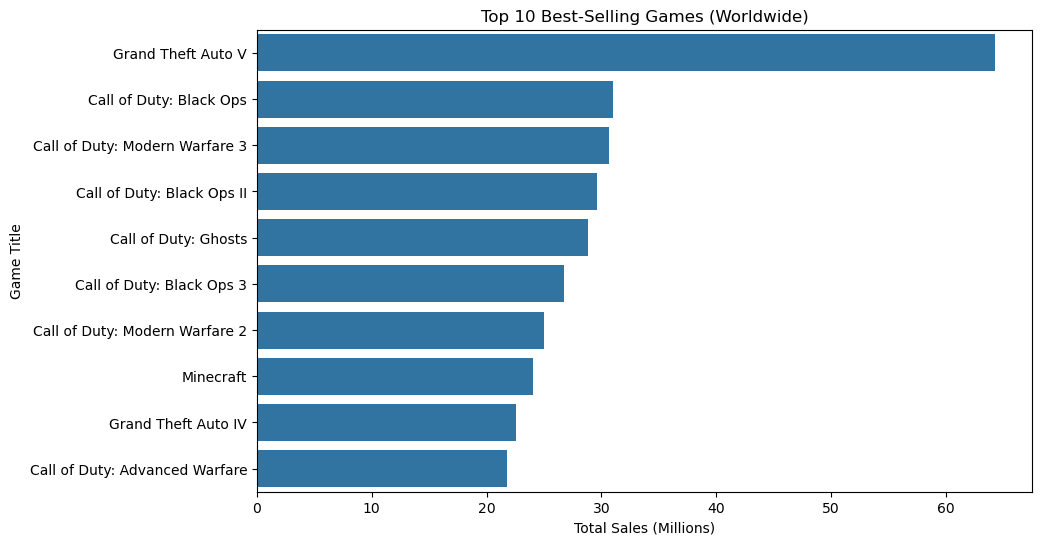

In [40]:
# Top 10 games by total sales
top_games = df[["title", "total_sales"]].groupby("title", as_index=False).agg({
    "total_sales":"sum"
}).sort_values('total_sales', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="total_sales", y="title", data=top_games, dodge=False)
plt.title("Top 10 Best-Selling Games (Worldwide)")
plt.xlabel("Total Sales (Millions)")
plt.ylabel("Game Title")
plt.show()
# Grant Theft Auto V

### 2.2 Industry over time

In [41]:
# Extract release year
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year

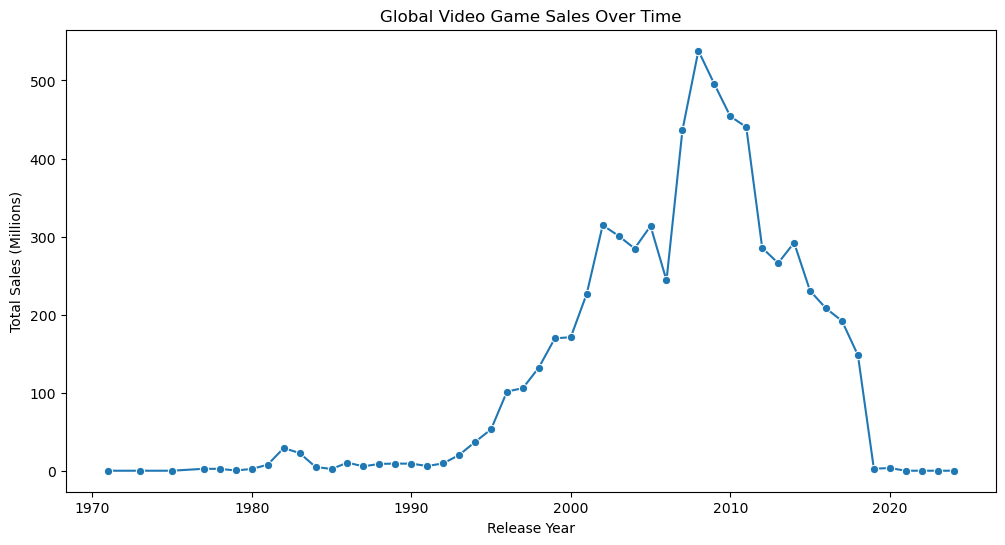

In [42]:
# Sales per year
sales_per_year = df.groupby("release_year")["total_sales"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="release_year", y="total_sales", data=sales_per_year, marker="o")
plt.title("Global Video Game Sales Over Time")
plt.xlabel("Release Year")
plt.ylabel("Total Sales (Millions)")
plt.show()

In [43]:
sales_per_year.sort_values('total_sales', ascending=False).head(5)

,release_year,total_sales
34,2008,538.09
35,2009,495.36
36,2010,454.02
37,2011,440.32
33,2007,436.39


### 2.3 Console vs. Genre

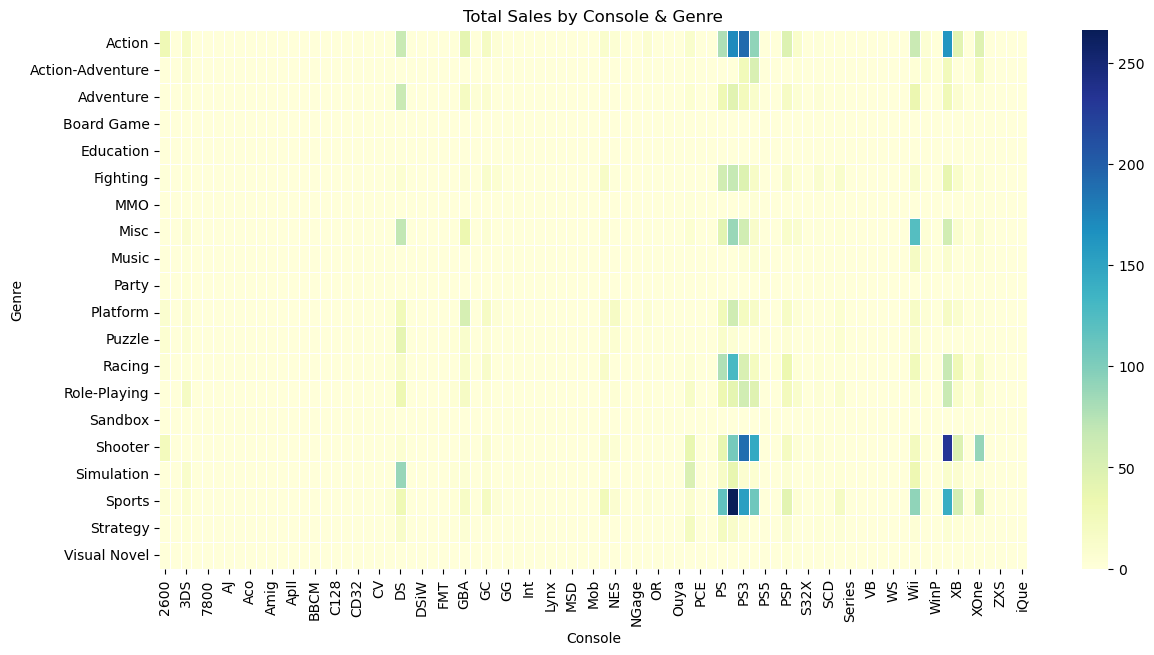

In [44]:
dw = pd.read_csv("vgchartz-2024.csv")
console_genre = dw.pivot_table(values="total_sales",
                               index="genre", 
                               columns="console", 
                               aggfunc="sum", 
                               fill_value=0)

plt.figure(figsize=(14,7))
sns.heatmap(console_genre, cmap="YlGnBu", linewidths=.5)
plt.title("Total Sales by Console & Genre")
plt.xlabel("Console")
plt.ylabel("Genre")
plt.show()

In [45]:
# Do any consoles seem to specialise in a particular genre?
console_genre_total_sales = df[["console", "genre", "total_sales"]].groupby(["console", "genre"], as_index=False).agg({
    "total_sales":"sum"
})
console_genre_total_sales.sort_values('total_sales', ascending=False).head(10)

,console,genre,total_sales
500,PS2,Sports,266.38
755,X360,Shooter,231.35
503,PS3,Action,191.51
515,PS3,Shooter,189.53
486,PS2,Action,170.92
742,X360,Action,161.89
517,PS3,Sports,153.16
533,PS4,Shooter,144.95
757,X360,Sports,140.95
496,PS2,Racing,127.91


In [56]:
# console genre title count

console_genre_count = df[["console", "genre"]]
console_genre_count['count'] = 1
console_genre_count_group = console_genre_count.groupby(["console", "genre"], as_index=False)
console_genre_count = console_genre_count_group.agg({
    "count":"sum"
}).sort_values('count', ascending=False)
console_genre_count.head(30)

/tmp/ipykernel_2332931/3263709772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  console_genre_count['count'] = 1


,console,genre,count
430,PC,Adventure,1557
446,PC,Strategy,1439
435,PC,Misc,1293
428,PC,Action,1002
441,PC,Role-Playing,998
443,PC,Shooter,995
444,PC,Simulation,845
166,DS,Misc,824
115,And,Misc,677
500,PS2,Sports,555


In [57]:
# console genre with the most titles
console_genre_count.drop_duplicates(subset='console', keep='first')

,console,genre,count
430,PC,Adventure,1557
166,DS,Misc,824
115,And,Misc,677
500,PS2,Sports,555
475,PS,Misc,435
...,...,...,...
192,FMT,Misc,2
599,S32X,Shooter,2
136,C128,Adventure,1
131,BBCM,Misc,1


### 2.4 Regional Bestsellers

In [58]:
# Compare sales across na_sales, jp_sales, pal_sales, other_sales.
# Action: Scatter plots (NA vs JP, PAL vs NA, etc.) + highlight outliers.
# Result: Identifies culturally specific hits.

df[["title", "genre", "total_sales"]]
# first their total sales
# their most sold title (What titles are regional hits/flops?)
# their total sales across the year

,title,genre,total_sales
0,Grand Theft Auto V,Action,20.32
1,Grand Theft Auto V,Action,19.39
2,Grand Theft Auto: Vice City,Action,16.15
3,Grand Theft Auto V,Action,15.86
4,Call of Duty: Black Ops 3,Shooter,15.09
...,...,...,...
64010,World End Syndrome,Visual Novel,0.00
64011,XBlaze Lost: Memories,Visual Novel,0.00
64012,"Yoru, Tomosu",Visual Novel,0.00
64013,"Yoru, Tomosu",Visual Novel,0.00


In [59]:
# Do any consoles seem to specialise in a particular genre?
sales = df[["title", "total_sales", "na_sales", "jp_sales", "pal_sales", "other_sales"]].groupby(["title"], as_index=False).agg({
    "total_sales":"sum",
    "na_sales":"sum",
    "jp_sales":"sum",
    "pal_sales":"sum",
    "other_sales":"sum"
})
sales.head()

,title,total_sales,na_sales,jp_sales,pal_sales,other_sales
0,"""Nuke It""",0.00,0.00,0.00,0.0,0.00
1,#IDARB,0.00,0.00,0.00,0.0,0.00
2,#killallzombies,0.00,0.00,0.00,0.0,0.00
3,'70s Robot Anime: Geppy-X,0.00,0.00,0.00,0.0,0.00
4,'98 Koshien,0.41,0.15,0.12,0.1,0.03


In [60]:
# Define a helper function
def top_and_bottom_by_region(df, region):
    region_sales = df[["title", region]]
    top_titles = region_sales.sort_values(by=region, ascending=False)
    bottom_titles = region_sales.sort_values(by=region, ascending=True)
    return top_titles, bottom_titles

# Example for NA region
top_total, bottom_total = top_and_bottom_by_region(sales, "total_sales")
top_na, bottom_na = top_and_bottom_by_region(sales, "na_sales")
top_jp, bottom_jp = top_and_bottom_by_region(sales, "jp_sales")
top_pal, bottom_pal = top_and_bottom_by_region(sales, "pal_sales")
top_other, bottom_other = top_and_bottom_by_region(sales, "other_sales")

print("Top 5 Games (Global)")
display(top_total.head().reset_index(drop=True))
print("\nWorst 5 Games (Global - non-zero sales)")
display(bottom_total[bottom_total["total_sales"] > 0].head().reset_index(drop=True))

print("Top 5 Games in North America")
display(top_na.head().reset_index(drop=True))
print("\nWorst 5 Games in North America (non-zero sales)")
display(bottom_na[bottom_na["na_sales"] > 0].head().reset_index(drop=True))

print("Top 5 Games in Japan")
display(top_jp.head().reset_index(drop=True))
print("\nWorst 5 Games in Japan (non-zero sales)")
display(bottom_jp[bottom_jp["jp_sales"] > 0].head().reset_index(drop=True))

print("Top 5 Games in European & African")
display(top_pal.head().reset_index(drop=True))
print("\nWorst 5 Games in European & African (non-zero sales)")
display(bottom_pal[bottom_pal["pal_sales"] > 0].head().reset_index(drop=True))

print("Top 5 Games (Rest of world)")
display(top_other.head().reset_index(drop=True))
print("\nWorst 5 Games (Rest of world)")
display(bottom_other[bottom_other["other_sales"] > 0].head().reset_index(drop=True))

Top 5 Games (Global)


,title,total_sales
0,Grand Theft Auto V,64.29
1,Call of Duty: Black Ops,30.99
2,Call of Duty: Modern Warfare 3,30.71
3,Call of Duty: Black Ops II,29.59
4,Call of Duty: Ghosts,28.80



Worst 5 Games (Global - non-zero sales)


,title,total_sales
0,Hospital Tycoon,0.01
1,Nancy Drew: The Phantom of Venice,0.01
2,Soni Pro,0.01
3,Wizardry XTH: Unlimited Students,0.01
4,E.T. The Extra-Terrestrial,0.01


Top 5 Games in North America


,title,na_sales
0,Grand Theft Auto V,26.19
1,Call of Duty: Black Ops,17.65
2,Call of Duty: Modern Warfare 3,15.57
3,Call of Duty: Ghosts,15.06
4,Call of Duty: Black Ops II,14.12



Worst 5 Games in North America (non-zero sales)


,title,na_sales
0,Action Girlz Racing,0.01
1,Bottom of the 9th '97,0.01
2,The Sims 3: High-End Loft Stuff,0.01
3,Dawn of Fantasy,0.01
4,Just Deal With It,0.01


Top 5 Games in Japan


,title,jp_sales
0,Hot Shots Golf,4.26
1,Minecraft,2.50
2,R.B.I. Baseball,2.05
3,Famista '89 - Kaimaku Han!!,2.05
4,Final Fantasy XIII,1.88



Worst 5 Games in Japan (non-zero sales)


,title,jp_sales
0,Soni Pro,0.01
1,Brute Force,0.01
2,Adventures to Go!,0.01
3,The King of Fighters NESTS Collection,0.01
4,Gardening Mama,0.01


Top 5 Games in European & African


,title,pal_sales
0,Grand Theft Auto V,28.14
1,FIFA 15,12.45
2,FIFA 14,12.14
3,FIFA 17,12.07
4,FIFA 18,11.78



Worst 5 Games in European & African (non-zero sales)


,title,pal_sales
0,Metal Dungeon,0.01
1,Ratchet & Clank: Full Frontal Assault,0.01
2,Pinball Tycoon,0.01
3,4 Play Collection: Treasure Hunters,0.01
4,Cities: Skylines Snowfall,0.01


Top 5 Games (Rest of world)


,title,other_sales
0,Grand Theft Auto V,8.32
1,Call of Duty: Black Ops II,3.67
2,Call of Duty: Ghosts,3.65
3,Call of Duty: Black Ops 3,3.63
4,FIFA Soccer 08,3.53



Worst 5 Games (Rest of world)


,title,other_sales
0,KuruKuru Kururin,0.01
1,L.A. Noire: The Complete Edition,0.01
2,4 Game Fun Pack: Monopoly / Boggle / Yahtzee /...,0.01
3,4X4 EVO 2,0.01
4,7th Dragon III Code: VFD,0.01


In [61]:
# Total sales per region
total_regional_sales_per_year = df[["na_sales", "jp_sales", "pal_sales", "other_sales"]].agg({
    "na_sales":"sum",
    "jp_sales":"sum",
    "pal_sales":"sum",
    "other_sales":"sum"
})
total_regional_sales_per_year

na_sales       3344.76
jp_sales        684.24
pal_sales      1914.64
other_sales     650.51
dtype: float64

### 2.5 Checking for relationship between Rating and Total sales

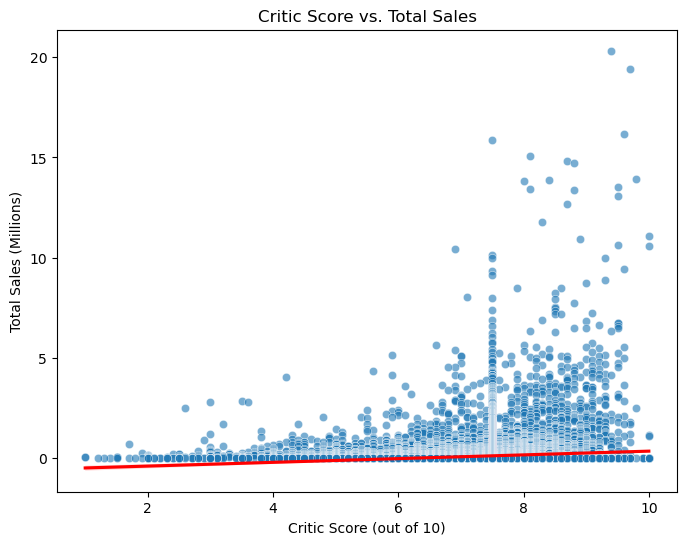

Correlation between critic score and sales: 0.10


In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="critic_score", y="total_sales", data=df, alpha=0.6)
sns.regplot(x="critic_score", y="total_sales", data=df, scatter=False, color="red")
plt.title("Critic Score vs. Total Sales")
plt.xlabel("Critic Score (out of 10)")
plt.ylabel("Total Sales (Millions)")
plt.show()

# Correlation
correlation = df["critic_score"].corr(df["total_sales"])
print(f"Correlation between critic score and sales: {correlation:.2f}")


### 2.6 Ranking of Top Publisher and Developer by Global Sales

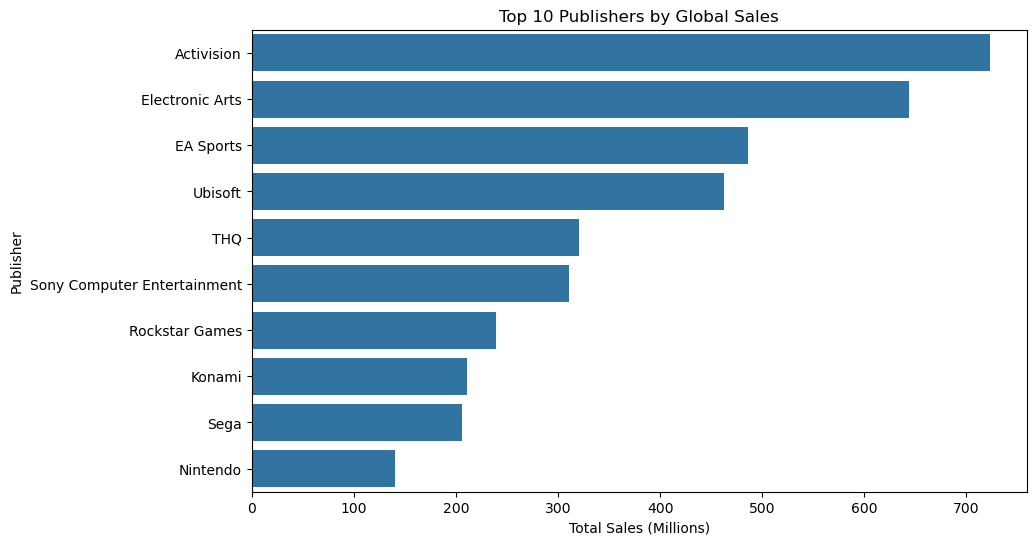

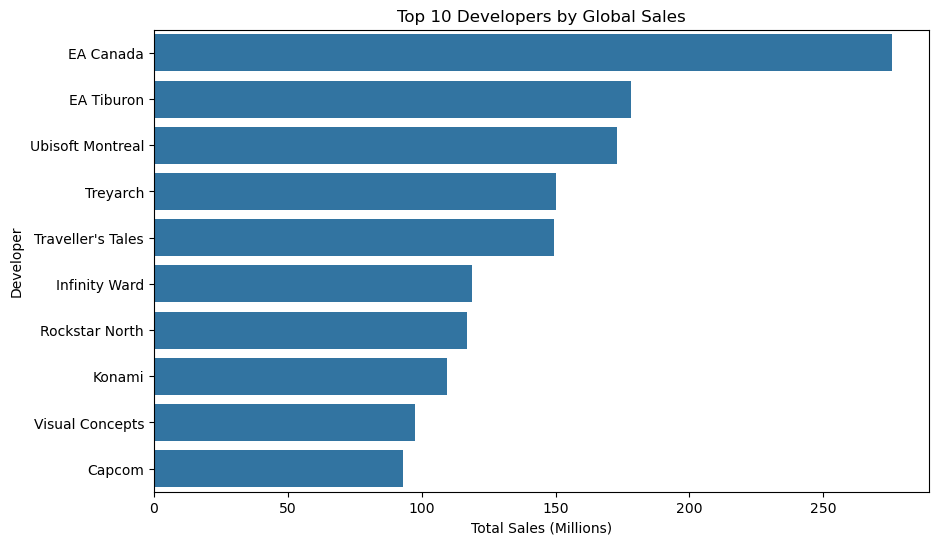

In [63]:
# Top publishers
top_publishers = df.groupby("publisher")["total_sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title("Top 10 Publishers by Global Sales")
plt.xlabel("Total Sales (Millions)")
plt.ylabel("Publisher")
plt.show()

# Top developers
top_developers = df.groupby("developer")["total_sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_developers.values, y=top_developers.index)
plt.title("Top 10 Developers by Global Sales")
plt.xlabel("Total Sales (Millions)")
plt.ylabel("Developer")
plt.show()

## Stage 3: Time Series Analysis

### 3.1 Aggregate Sales Over Time

In [64]:
sales_by_year = (
    df.groupby("release_year")["total_sales"]
    .sum()
    .reset_index()
    .sort_values("release_year")
)
sales_by_year.head()

,release_year,total_sales
0,1971,0.00
1,1973,0.00
2,1975,0.00
3,1977,2.50
4,1978,2.36


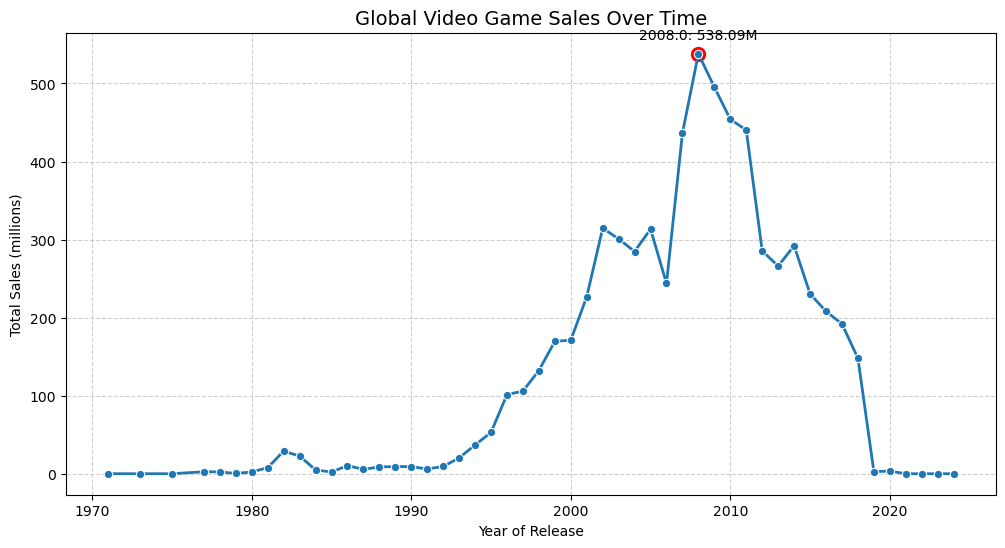

In [65]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=sales_by_year, 
    x="release_year", 
    y="total_sales", 
    marker="o", 
    linewidth=2
)
# Mark significant points (e.g., peaks or troughs)
significant_points = sales_by_year[sales_by_year['total_sales'] > 500]  # Define your condition here
plt.scatter(significant_points['release_year'], significant_points['total_sales'], color='red', s=100, label='Significant Point')

# Annotate significant points
for i, row in significant_points.iterrows():
    plt.annotate(f"{row['release_year']}: {row['total_sales']:.2f}M", (row['release_year'], row['total_sales']), textcoords="offset points", xytext=(0,10), ha='center')
significant_points = sales_by_year.loc[sales_by_year['total_sales'].idxmax()]  # Peak point

plt.title("Global Video Game Sales Over Time", fontsize=14)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales (millions)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### 3.2 Console-Specific Trends

In [66]:
sales_by_console = (
    df.groupby(["console", "release_year"])["total_sales"]
    .sum()
    .reset_index()
    # .sort_values("release_year")
)
sales_by_console.head()

,console,release_year,total_sales
0,2600,1977,2.50
1,2600,1978,2.36
2,2600,1979,0.31
3,2600,1980,2.26
4,2600,1981,7.73


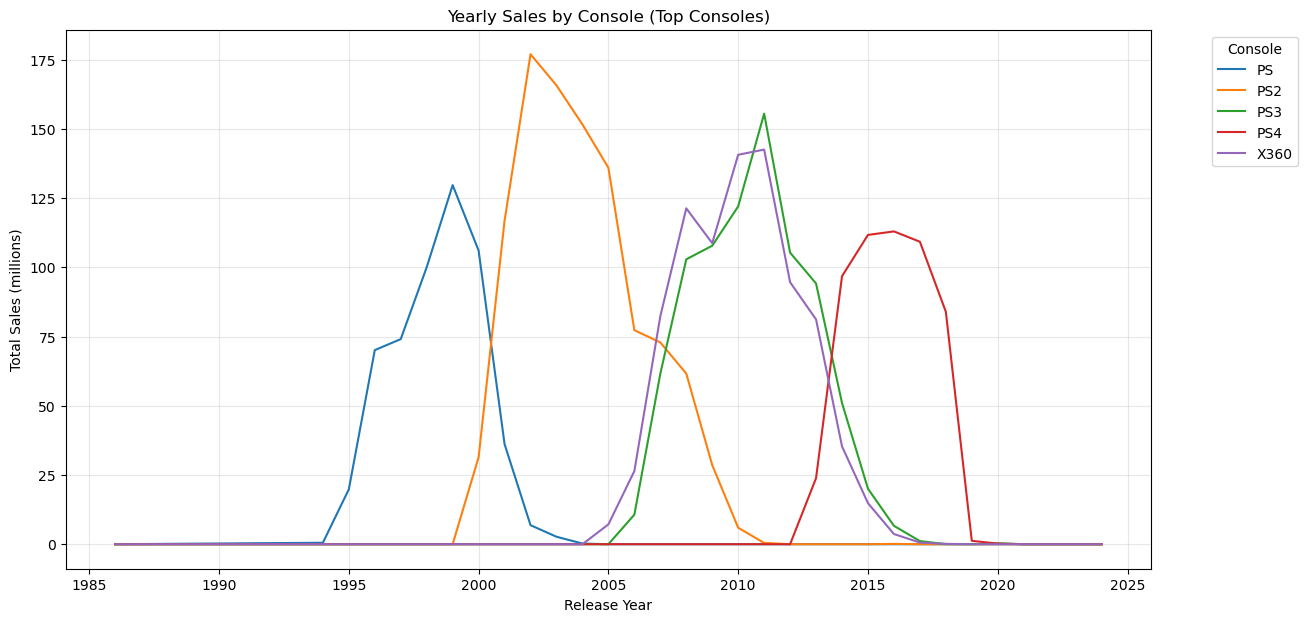

In [67]:
# 2. Group sales by console and release_year
console_yearly = (
    df.groupby(['console', 'release_year'])['total_sales']
    .sum()
    .reset_index()
)

# 3. Identify top consoles (by lifetime total sales)
top_consoles = (
    df.groupby('console')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)   # top 10 consoles
    .index
)

console_yearly_top = console_yearly[console_yearly['console'].isin(top_consoles)]

# 4. Pivot into year × console format
console_pivot = console_yearly_top.pivot(
    index='release_year',
    columns='console',
    values='total_sales'
).fillna(0)

# 5. Plot multi-line chart
plt.figure(figsize=(14, 7))
for console in console_pivot.columns:
    plt.plot(console_pivot.index, console_pivot[console], label=console)

plt.title("Yearly Sales by Console (Top Consoles)")
plt.xlabel("Release Year")
plt.ylabel("Total Sales (millions)")
plt.legend(title="Console", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


### 3.3 Genre-Specific Trends

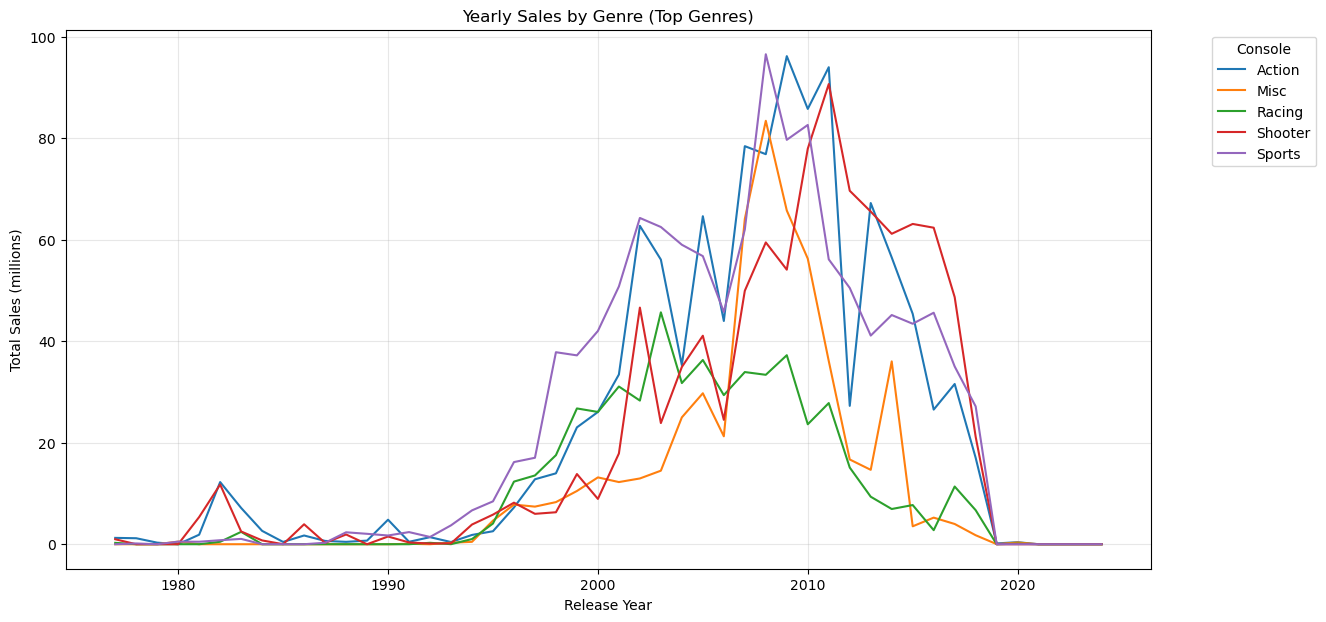

In [68]:
# 2. Group sales by console and release_year
console_yearly = (
    df.groupby(['genre', 'release_year'])['total_sales']
    .sum()
    .reset_index()
)

# 3. Identify top consoles (by lifetime total sales)
top_consoles = (
    df.groupby('genre')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)   # top 10 consoles
    .index
)

console_yearly_top = console_yearly[console_yearly['genre'].isin(top_consoles)]

# 4. Pivot into year × console format
console_pivot = console_yearly_top.pivot(
    index='release_year',
    columns='genre',
    values='total_sales'
).fillna(0)

# 5. Plot multi-line chart
plt.figure(figsize=(14, 7))
for console in console_pivot.columns:
    plt.plot(console_pivot.index, console_pivot[console], label=console)

plt.title("Yearly Sales by Genre (Top Genres)")
plt.xlabel("Release Year")
plt.ylabel("Total Sales (millions)")
plt.legend(title="Console", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


### 3.4 Regional Time  Series

In [69]:
#Aggregate regional sales by year
regional_sales_by_year = (
    df.groupby("release_year")[["na_sales", "jp_sales", "pal_sales", "other_sales"]]
    .sum()
    .reset_index()
    .sort_values("release_year")
)

   release_year  na_sales  jp_sales  pal_sales  other_sales
0          1971      0.00       0.0       0.00         0.00
1          1973      0.00       0.0       0.00         0.00
2          1975      0.00       0.0       0.00         0.00
3          1977      2.34       0.0       0.14         0.02
4          1978      2.20       0.0       0.14         0.00


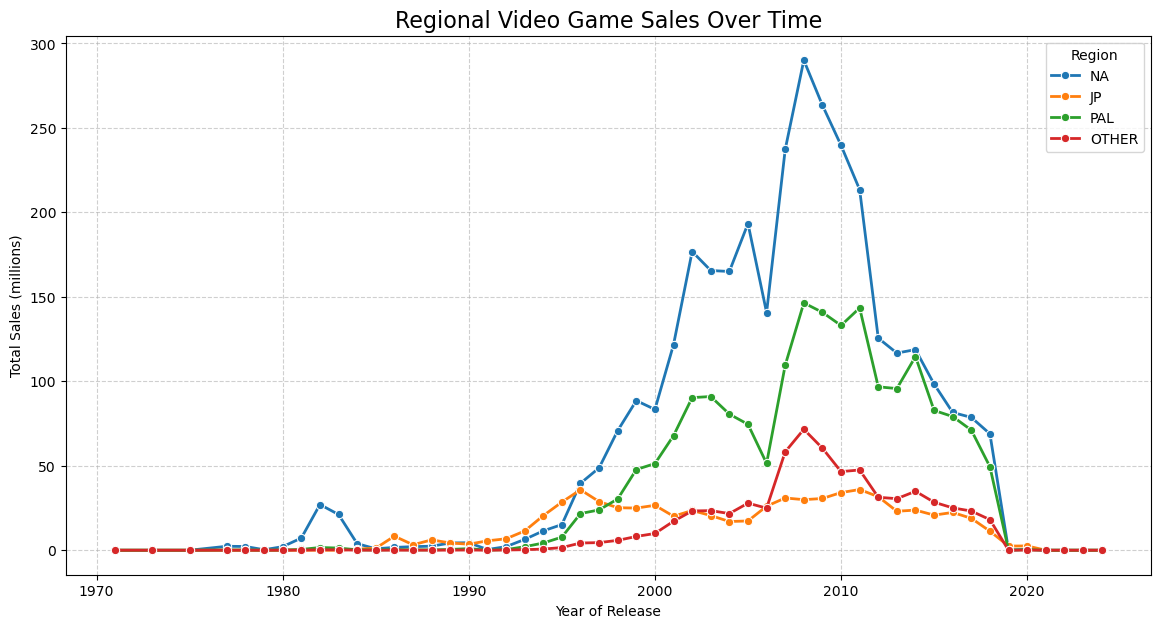

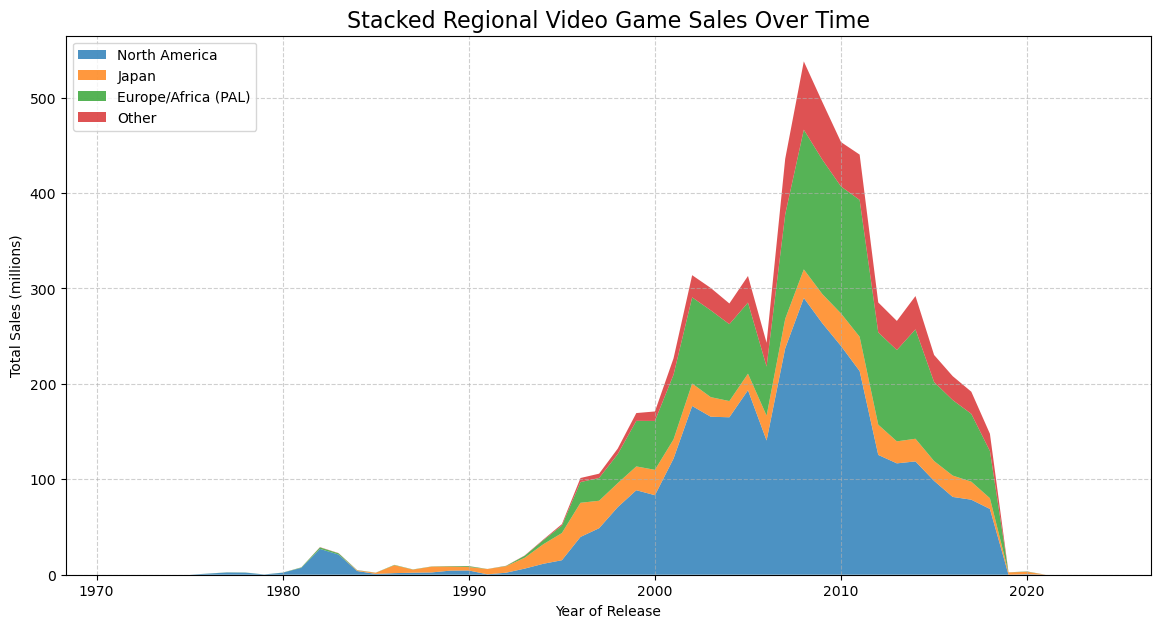

In [70]:
# 4. Preview
print(regional_sales_by_year.head())

# 5. Plot sales trends for all regions on one chart
plt.figure(figsize=(14,7))

for col in ["na_sales", "jp_sales", "pal_sales", "other_sales"]:
    sns.lineplot(
        data=regional_sales_by_year, 
        x="release_year", 
        y=col, 
        marker="o", 
        linewidth=2, 
        label=col.replace("_sales","").upper()
    )

plt.title("Regional Video Game Sales Over Time", fontsize=16)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales (millions)")
plt.legend(title="Region", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(14,7))
plt.stackplot(
    regional_sales_by_year["release_year"],
    regional_sales_by_year["na_sales"],
    regional_sales_by_year["jp_sales"],
    regional_sales_by_year["pal_sales"],
    regional_sales_by_year["other_sales"],
    labels=["North America", "Japan", "Europe/Africa (PAL)", "Other"],
    alpha=0.8
)

plt.title("Stacked Regional Video Game Sales Over Time", fontsize=16)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales (millions)")
plt.legend(loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Stage 4: Forecasting

### 4.1 Univariate Series (Global Sales)

In [210]:
# Aggregate yearly global sales
yearly_sales = df.groupby('release_year')['total_sales'].sum()

# Reindex to fill missing years
year_range = pd.RangeIndex(start=yearly_sales.index.min(),
                           stop=yearly_sales.index.max() + 1)
yearly_sales = yearly_sales.reindex(year_range, fill_value=0)

# Convert to time series index
yearly_sales.index = pd.to_datetime(yearly_sales.index, format='%Y')

### 4.2 — Multivariate Series (Regional Sales)

In [211]:
# Multivariate Regional Series ---
regional_sales = df.groupby('release_year')[['na_sales', 'jp_sales', 
                                             'pal_sales', 'other_sales']].sum()
# Reindex to ensure continuous years
regional_sales = regional_sales.reindex(year_range, fill_value=0)
regional_sales.index = pd.to_datetime(regional_sales.index, format='%Y')

# Add global totals as a column
regional_sales['total_sales'] = yearly_sales.values


### 4.3 — Visualization of Prepared Series

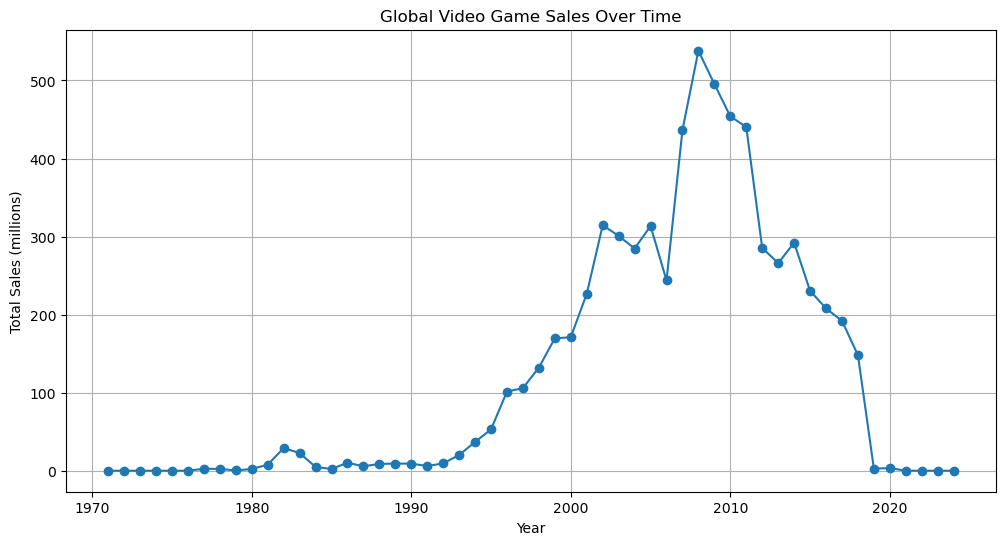

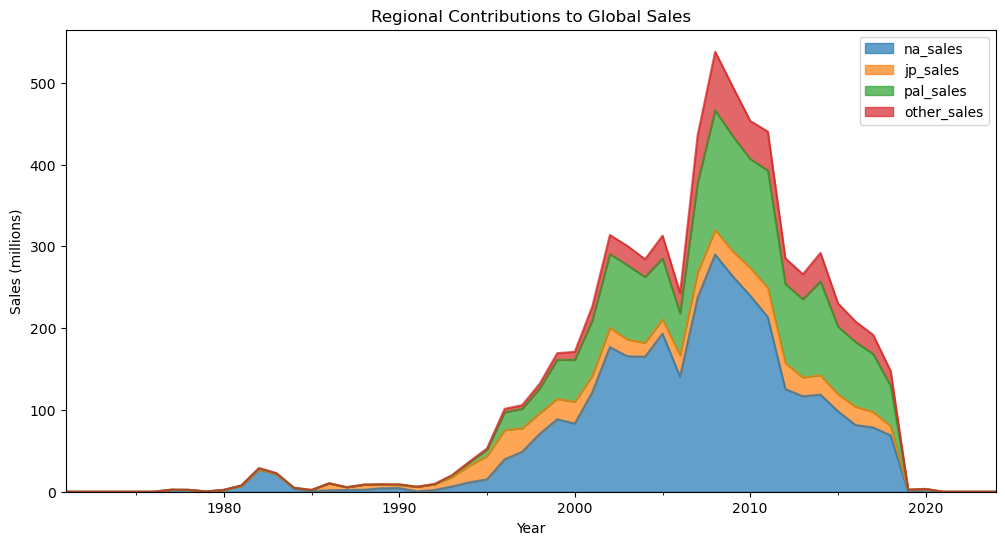

In [213]:
# --- Stage 4.3: Visualization ---
plt.figure(figsize=(12,6))
plt.plot(yearly_sales, marker='o')
plt.title("Global Video Game Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales (millions)")
plt.grid(True)
plt.show()

# Regional stacked area chart
regional_sales[['na_sales','jp_sales','pal_sales','other_sales']].plot(
    kind='area', stacked=True, figsize=(12,6), alpha=0.7)
plt.title("Regional Contributions to Global Sales")
plt.xlabel("Year")
plt.ylabel("Sales (millions)")
plt.show()

## Stage 5a Global Forcast

### setup

In [72]:
# !pip install prophet
# !pip install pmdarima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

### 1. Prepare data

In [96]:
# Aggregate yearly sales
yearly_sales = df.groupby(df['release_date'].dt.to_period("Y"))['total_sales'].sum()

# Convert PeriodIndex → TimestampIndex at year-end
yearly_sales.index = yearly_sales.index.to_timestamp("Y")

# Ensure continuous year index
year_range = pd.date_range(start=yearly_sales.index.min(),
                           end=yearly_sales.index.max(),
                           freq="YE")

yearly_sales = yearly_sales.reindex(year_range, fill_value=0)


### 2. Train-Test Split

In [97]:
# ------------------------------
# 3. Train-Test Split
# ------------------------------
train = yearly_sales.loc[:'2013'].asfreq("YE") 
test = yearly_sales.loc['2014':].asfreq("YE") 

print("Train size:", train.shape)
print("Test size:", test.shape)

Train size: (43,)
Test size: (11,)


In [99]:
test

2014-12-31    292.11
2015-12-31    230.45
2016-12-31    208.02
2017-12-31    191.96
2018-12-31    148.03
2019-12-31      2.55
2020-12-31      3.45
2021-12-31      0.00
2022-12-31      0.00
2023-12-31      0.00
2024-12-31      0.00
Freq: YE-DEC, Name: total_sales, dtype: float64

### 3. Forecast models (ARIMA/Exponential Smoothing/Prophet)

/home/civm/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/civm/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/civm/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/civm/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/civm/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=448.418, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=449.815, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=449.681, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=447.142, Time=0.04 sec


/home/civm/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/civm/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/civm/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
05:08:09 - cmdstanpy - INFO - Chain [1] start processing


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=451.009, Time=0.25 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.805 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -222.571
Date:                Mon, 01 Sep 2025   AIC                            447.142
Time:                        05:08:09   BIC                            448.880
Sample:                    12-31-1971   HQIC                           447.779
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2346.6359    250.325      9.374      0.000    1856.009  

05:08:09 - cmdstanpy - INFO - Chain [1] done processing


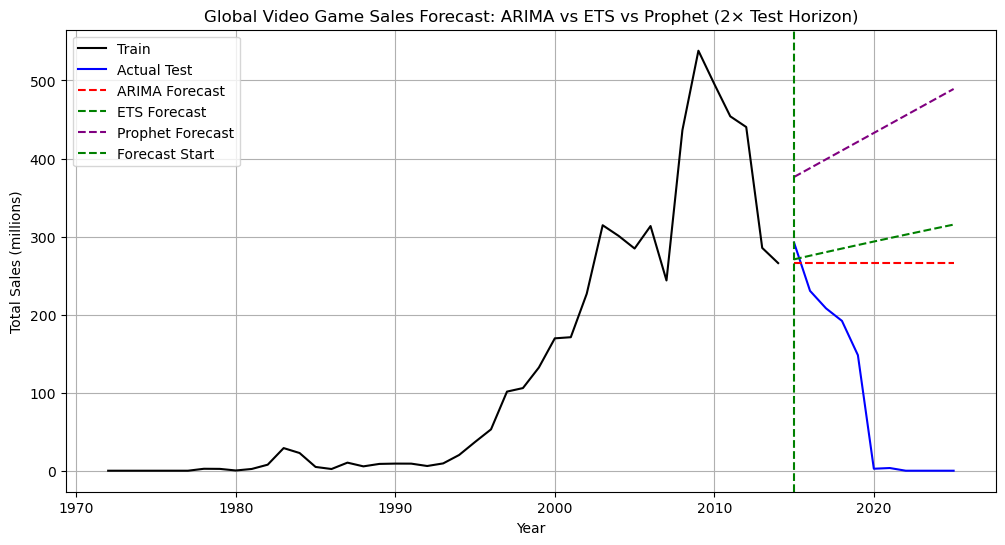

In [104]:
horizon = len(test)

# 3a. ARIMA
# from pmdarima import auto_arima
auto_model = auto_arima(train, seasonal=False, trace=True, error_action="ignore", suppress_warnings=True)
print(auto_model.summary())

# Forecast directly
arima_forecast_full = auto_model.predict(n_periods=horizon)

# ------------------------------
# 3b. Exponential Smoothing (ETS)
# ------------------------------
ets_model = ExponentialSmoothing(train, trend="add", damped_trend=True, seasonal=None)
ets_fit = ets_model.fit(optimized=True)
ets_forecast_full = ets_fit.forecast(horizon)

# ------------------------------
# 3c. Prophet
# ------------------------------
prophet_df = train.reset_index()
prophet_df.columns = ["ds","y"]

prophet_model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(horizon, freq="YE")
forecast = prophet_model.predict(future)

prophet_forecast_full = forecast.set_index("ds")['yhat'][-horizon:]

# ------------------------------
# 4. Plot Actual vs Forecasts
# ------------------------------
plt.figure(figsize=(12,6))
# Plot actual
plt.plot(train.index, train, label="Train", color="black")
plt.plot(test.index, test, label="Actual Test", color="blue")


forecast_index = pd.date_range(start=test.index[0], periods=horizon, freq="YE")

# Plot forecasts
plt.plot(forecast_index, arima_forecast_full, "--", label="ARIMA Forecast", color="red")
plt.plot(forecast_index, ets_forecast_full, "--", label="ETS Forecast", color="green")
plt.plot(prophet_forecast_full.index, prophet_forecast_full, "--", label="Prophet Forecast", color="purple")

# Mark forecast start
plt.axvline(test.index[0], color="green", linestyle="--", label="Forecast Start")

plt.title("Global Video Game Sales Forecast: ARIMA vs ETS vs Prophet (2× Test Horizon)")
plt.xlabel("Year")
plt.ylabel("Total Sales (millions)")
plt.legend()
plt.grid(True)
plt.show()

### 4. Evaluation Metrics

In [105]:
def evaluate(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return {"Model": name, "RMSE": rmse, "MAPE": mape}

results = []
results.append(evaluate(test, arima_forecast_full, "ARIMA"))
results.append(evaluate(test, ets_forecast_full, "ETS"))
results.append(evaluate(test, prophet_forecast_full, "Prophet"))

results_df = pd.DataFrame(results)
print(results_df)

     Model        RMSE          MAPE
0    ARIMA  201.374473  4.356209e+17
1      ETS  231.490313  5.058776e+17
2  Prophet  364.595981  7.732671e+17


## Export Arima Model

In [106]:
import joblib

# # save ARIMA model
# joblib.dump(arima_fit, "arima_model.pkl")
joblib.dump(auto_model, "arima_model.pkl")


['arima_model.pkl']

In [ ]:
# curl -X POST http://127.0.0.1:5000/forecast \
#      -H "Content-Type: application/json" \
#      -d '{"steps": 10}'

# Response:
# {
#   "forecast": [202.45, 210.33, 218.77, 227.81, ...]
# }

# 6. Optional Enhancements

# Add endpoints for ARIMA, ETS, Prophet separately

# Deploy on Heroku, AWS, or Docker

# Add input like “year range” or “sales history” so it can retrain

# 👉 Question for you:
# Do you want this API to be only forecast endpoint (fixed trained model), or should it also retrain when new data is sent?